<a href="https://colab.research.google.com/github/maxriosg/TelecomX_2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd

In [51]:
df = pd.read_csv("datos_tratados.csv")

In [52]:
df.head()

,customerID,Evasion,TipoContrato,FacturacionElectronica,MetodoPago,PagoMensual,PagoTotal,customer_gender,customer_seniorcitizen,customer_partner,...,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,Cuentas_Diarias
0,0002-orfbo,0.0,anual,1,mailed check,65.6,593.30,female,0,NaN,...,yes,no,dsl,no,yes,no,yes,yes,no,2.186667
1,0003-mknfe,0.0,mensual,0,mailed check,59.9,542.40,male,0,0.0,...,yes,yes,dsl,no,no,no,no,no,yes,1.996667
2,0004-tlhlj,1.0,mensual,1,electronic check,73.9,280.85,male,0,0.0,...,yes,no,fiber optic,no,no,yes,no,no,no,2.463333
3,0011-igkff,0.0,mensual,1,electronic check,98.0,1237.85,male,1,NaN,...,yes,no,fiber optic,no,yes,yes,no,yes,yes,3.266667
4,0013-exchz,1.0,mensual,1,mailed check,83.9,267.40,female,1,NaN,...,yes,no,fiber optic,no,no,no,yes,yes,no,2.796667


In [53]:
df.columns

Index(['customerID', 'Evasion', 'TipoContrato', 'FacturacionElectronica',
       'MetodoPago', 'PagoMensual', 'PagoTotal', 'customer_gender',
       'customer_seniorcitizen', 'customer_partner', 'customer_dependents',
       'customer_tenure', 'phone_phoneservice', 'phone_multiplelines',
       'internet_internetservice', 'internet_onlinesecurity',
       'internet_onlinebackup', 'internet_deviceprotection',
       'internet_techsupport', 'internet_streamingtv',
       'internet_streamingmovies', 'Cuentas_Diarias'],
      dtype='object')

In [54]:
columna_a_eliminar = 'customerID'
df.drop(columns=[columna_a_eliminar], inplace=True)

In [55]:
print(df.columns)

Index(['Evasion', 'TipoContrato', 'FacturacionElectronica', 'MetodoPago',
       'PagoMensual', 'PagoTotal', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'Cuentas_Diarias'],
      dtype='object')


In [56]:
categorical_cols = df.select_dtypes(include='object').columns

In [57]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [58]:
print("Tipos de datos después de la codificación:")
print(df_encoded.info())

Tipos de datos después de la codificación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Evasion                                        7267 non-null   float64
 1   FacturacionElectronica                         7267 non-null   int64  
 2   PagoMensual                                    7267 non-null   float64
 3   PagoTotal                                      7267 non-null   float64
 4   customer_seniorcitizen                         7267 non-null   int64  
 5   customer_partner                               3749 non-null   float64
 6   customer_dependents                            5086 non-null   float64
 7   customer_tenure                                7267 non-null   int64  
 8   Cuentas_Diarias                                7267 non-null   float64
 9   TipoContr

In [59]:
# 1. Calcular el conteo de cada clase en la columna 'Evasion'
churn_counts = df_encoded['Evasion'].value_counts()
print("Conteo de clientes por clase de 'Evasion':")
print(churn_counts)

Conteo de clientes por clase de 'Evasion':
Evasion
0.0    4723
1.0    2544
Name: count, dtype: int64


In [60]:
# 2. Calcular la proporción (porcentaje) de cada clase
total_clients = churn_counts.sum()
churn_proportions = churn_counts / total_clients * 100

print("\nProporción de clientes por clase de 'Evasion':")
print(churn_proportions)


Proporción de clientes por clase de 'Evasion':
Evasion
0.0    64.992432
1.0    35.007568
Name: count, dtype: float64


In [61]:
# 3. Identificar si existe un desbalance (opcional, pero útil para la interpretación)
# Asumiendo que 1.0 es 'Evasion' (churn) y 0.0 es 'No Evasion' (no churn)
churn_percentage = 0.0  # Initialize to 0.0
no_churn_percentage = 0.0 # Initialize to 0.0

if 1.0 in churn_proportions.index:
    churn_percentage = churn_proportions[1.0]

if 0.0 in churn_proportions.index:
    no_churn_percentage = churn_proportions[0.0]

print(f"\nPorcentaje de clientes que CANCELARON (Evasion = 1): {churn_percentage:.2f}%")
print(f"Porcentaje de clientes que NO CANCELARON (Evasion = 0): {no_churn_percentage:.2f}%")


Porcentaje de clientes que CANCELARON (Evasion = 1): 35.01%
Porcentaje de clientes que NO CANCELARON (Evasion = 0): 64.99%


In [62]:
!pip install imbalanced-learn

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Recuperar X y y (preferiblemente los conjuntos balanceados con SMOTE)
# Si no aplicaste SMOTE, usa X y y originales (df_encoded.drop('Evasion', axis=1) y df_encoded['Evasion'])
# Aquí asumo que quieres trabajar con los datos balanceados si usaste SMOTE.
# Since SMOTE failed due to only one class in 'Evasion', we will use the original dataframes X and y.
X = df_encoded.drop('Evasion', axis=1) # Todas las columnas excepto 'Evasion'
y = df_encoded['Evasion']             # La columna 'Evasion'


# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# Es crucial hacer esto ANTES de escalar para evitar data leakage
# Removed stratify=y because y has only one class, which causes an error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 'stratify=y' asegura que la proporción de clases en y se mantenga en los conjuntos de train y test.

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")


# 3. Identificar las columnas numéricas que necesitan ser escaladas
# Las columnas One-Hot Encoding (0/1) no necesitan ser escaladas.
# Identificaremos las columnas que NO son binarias (es decir, no fueron creadas por get_dummies y no son 0/1)
# Ojo: esto es una heurística. Es mejor conocer tus datos.
# Las columnas originales numéricas eran: 'PagoMensual', 'PagoTotal', 'customer_tenure', 'Cuentas_Diarias'
# De las columnas actuales en X_train, debemos excluir las que ya son binarias (0 o 1)
numerical_cols_to_scale = []
for col in X_train.columns:
    # Una forma de identificar columnas no binarias es ver si tienen más de 2 valores únicos
    # y no fueron creadas por one-hot encoding (que típicamente son int)
    # o si son nuestras columnas numéricas originales.
    if X_train[col].nunique() > 2 and X_train[col].dtype != 'object':
        numerical_cols_to_scale.append(col)

print(f"\nColumnas numéricas a escalar: {numerical_cols_to_scale}")


# 4. Crear una instancia del StandardScaler
scaler = StandardScaler()

# 5. Ajustar el scaler SOLO en los datos de entrenamiento y luego transformar
# Fit (aprender los parámetros de media y desviación estándar) solo de X_train
X_train_scaled = scaler.fit_transform(X_train[numerical_cols_to_scale])

# Transformar X_train y X_test usando el scaler ajustado
X_test_scaled = scaler.transform(X_test[numerical_cols_to_scale])

# Re-convertir a DataFrame para mantener los nombres de las columnas y facilitar el manejo
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols_to_scale, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols_to_scale, index=X_test.index)

# Concatenar las columnas escaladas con las columnas categóricas (que no se escalan)
# Primero, identifica las columnas que NO se escalaron
cols_not_scaled = [col for col in X_train.columns if col not in numerical_cols_to_scale]

# Unir las columnas escaladas y no escaladas
X_train_final = pd.concat([X_train_scaled_df, X_train[cols_not_scaled]], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test[cols_not_scaled]], axis=1)


# 6. Verificar los resultados
print("\nPrimeras 5 filas de X_train_final (después de estandarizar):")
print(X_train_final.head())

print("\nMedia y desviación estándar de las columnas escaladas en X_train_final:")
print(X_train_final[numerical_cols_to_scale].describe().loc[['mean', 'std']])

# Asegurar de que las medias sean cercanas a 0 y las desviaciones estándar cercanas a 1
# para las columnas escaladas.

Dimensiones de X_train: (5813, 31)
Dimensiones de X_test: (1454, 31)
Dimensiones de y_train: (5813,)
Dimensiones de y_test: (1454,)

Columnas numéricas a escalar: ['PagoMensual', 'PagoTotal', 'customer_tenure', 'Cuentas_Diarias']

Primeras 5 filas de X_train_final (después de estandarizar):
      PagoMensual  PagoTotal  customer_tenure  Cuentas_Diarias  \
4292     0.986761   0.308875        -0.054918         0.986761   
4794     1.009994   0.885539         0.514928         1.009994   
3172    -0.926644  -0.958010        -1.194608        -0.926644   
6358    -0.714228  -0.909329        -1.113202        -0.714228   
1956     0.440785  -0.971537        -1.276015         0.440785   

      FacturacionElectronica  customer_seniorcitizen  customer_partner  \
4292                       1                       0               0.0   
4794                       1                       0               NaN   
3172                       1                       0               0.0   
6358           

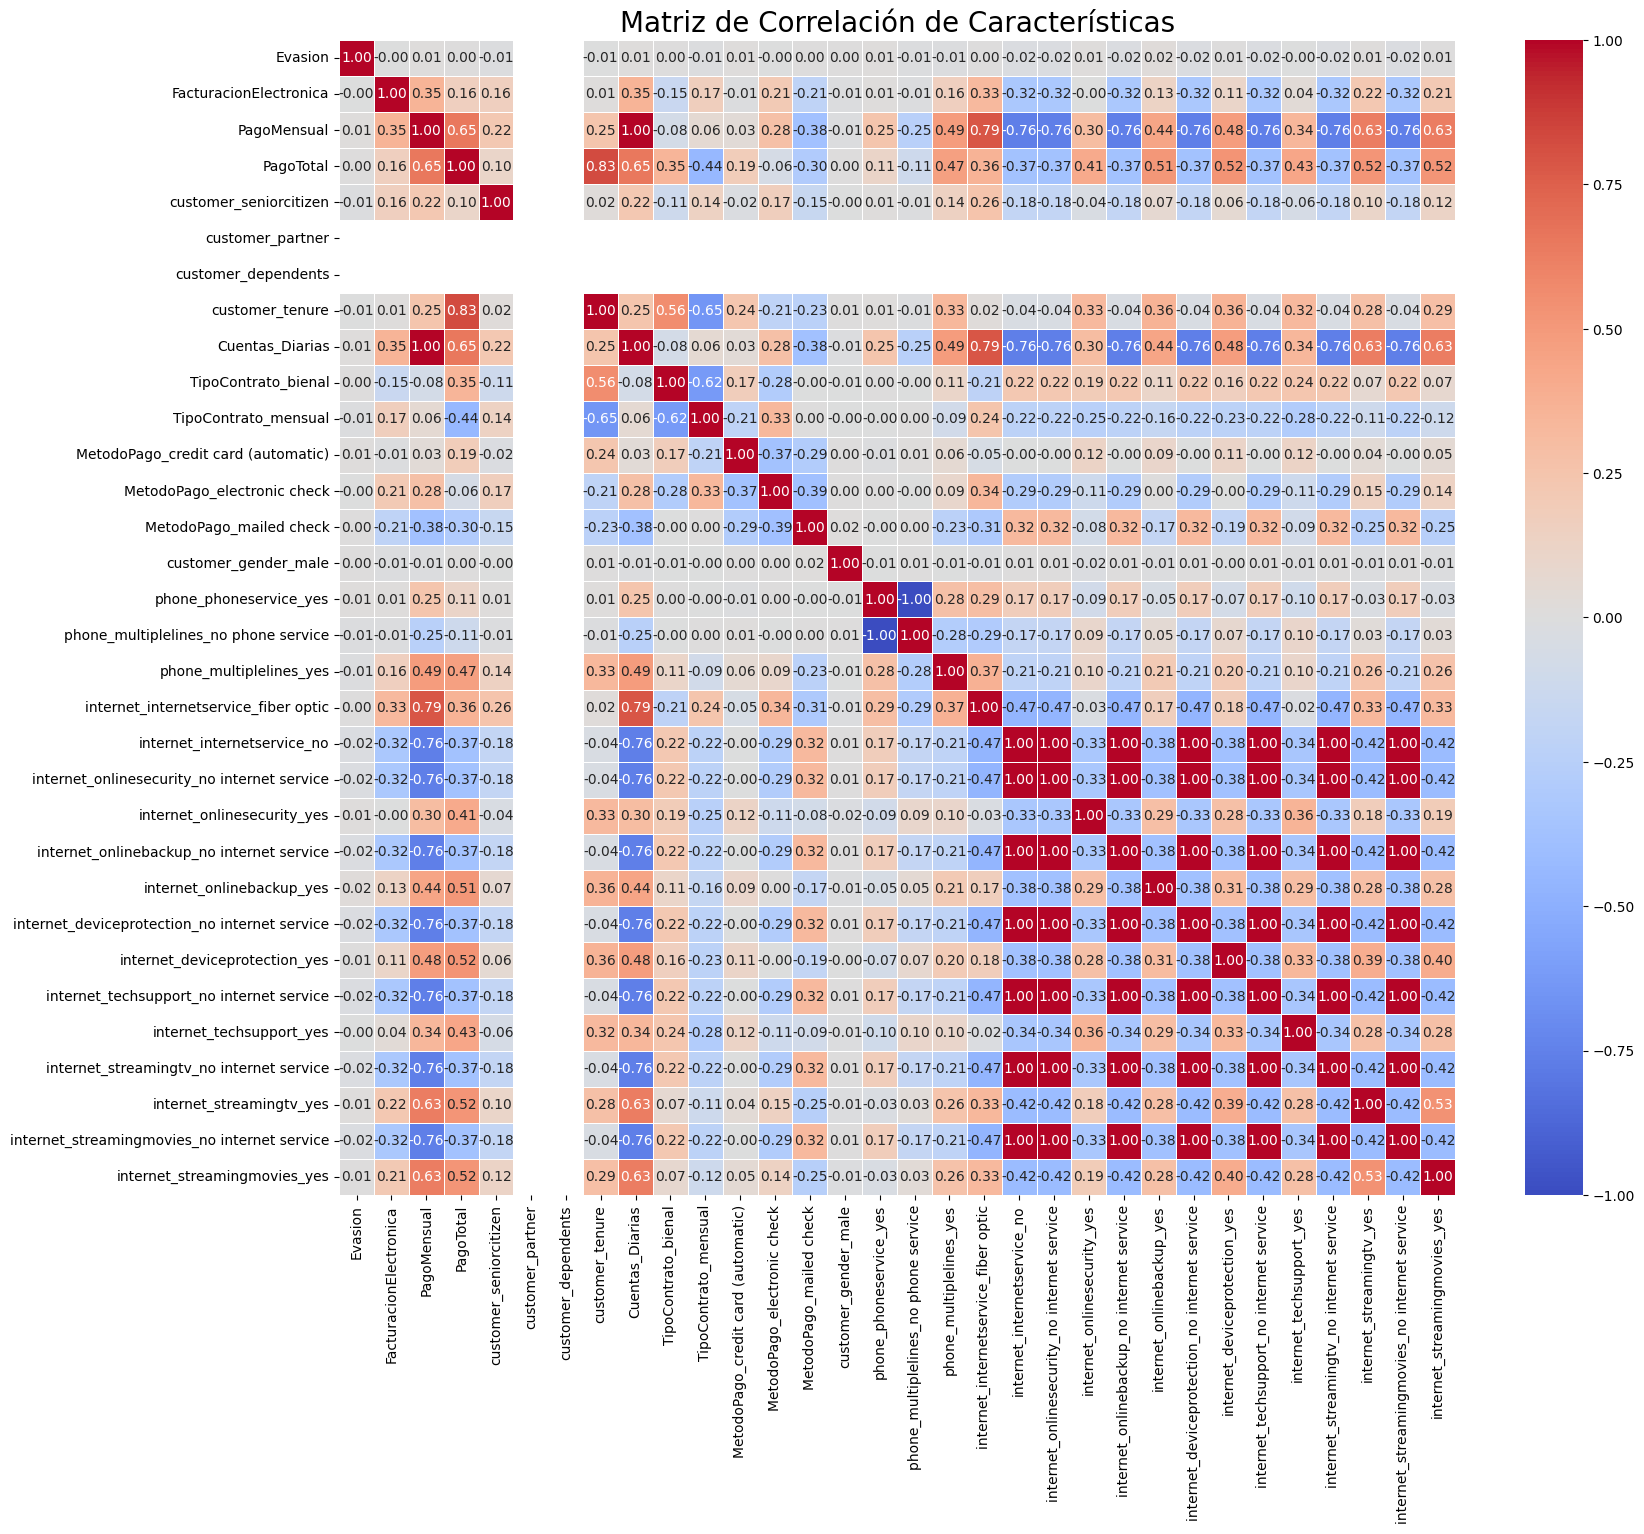


Correlación de todas las variables con 'Evasion':
Evasion                                          1.000000
internet_onlinebackup_yes                        0.020889
internet_onlinesecurity_yes                      0.013754
Cuentas_Diarias                                  0.012800
PagoMensual                                      0.012800
MetodoPago_credit card (automatic)               0.011979
internet_streamingtv_yes                         0.011442
phone_phoneservice_yes                           0.009251
internet_deviceprotection_yes                    0.005447
internet_streamingmovies_yes                     0.005440
customer_gender_male                             0.004311
internet_internetservice_fiber optic             0.001428
PagoTotal                                        0.000973
MetodoPago_mailed check                          0.000772
TipoContrato_bienal                              0.000553
FacturacionElectronica                          -0.000691
internet_techsupport_

/tmp/ipython-input-64-3818848509.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_churn.values, y=correlation_with_churn.index, palette='viridis')


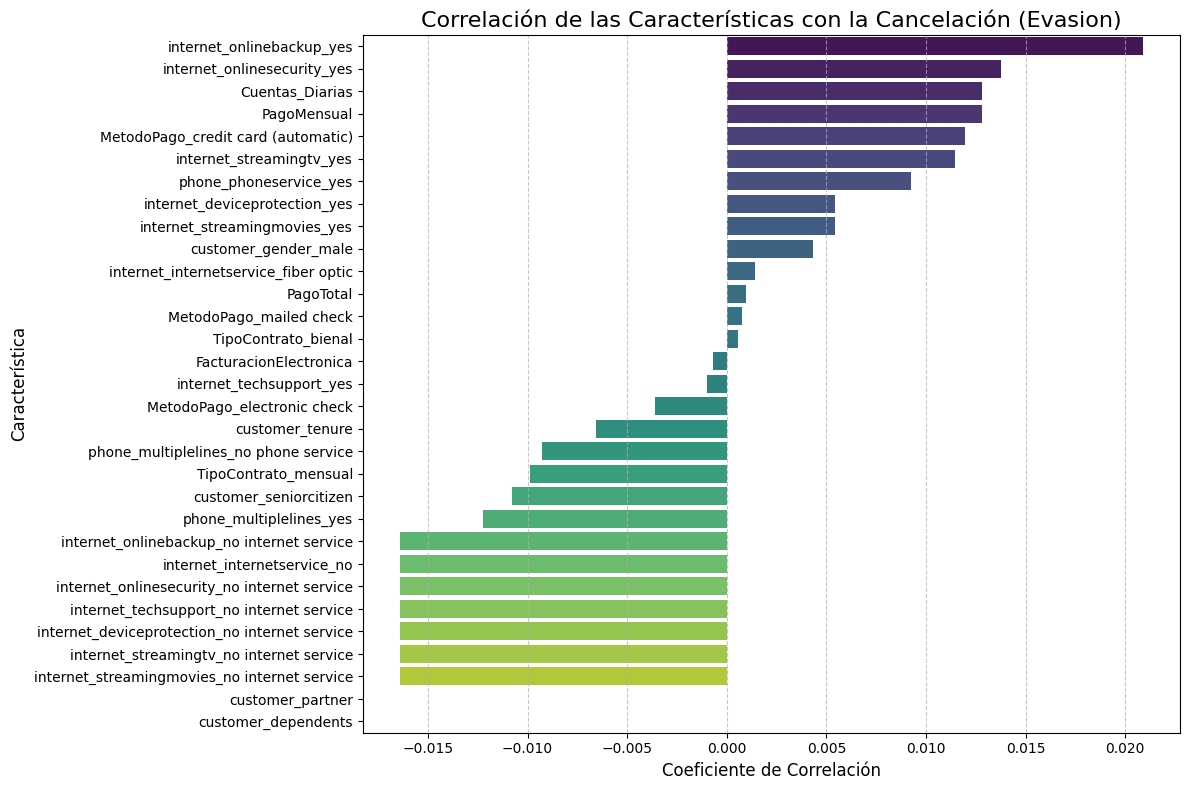

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Visualizar la matriz de correlación con un mapa de calor (heatmap)
plt.figure(figsize=(18, 15)) # Ajusta el tamaño de la figura para mejor visualización
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Características', fontsize=20)
plt.show()

# ----------------------------------------------------------------------------------
# Análisis específico de la correlación con la variable objetivo 'Evasion'
# ----------------------------------------------------------------------------------
print("\nCorrelación de todas las variables con 'Evasion':")
print(correlation_matrix['Evasion'].sort_values(ascending=False))

# Opcional: Visualización de las correlaciones con 'Evasion' en un gráfico de barras
plt.figure(figsize=(12, 8))
# Excluimos 'Evasion' de la lista para no correlacionarla consigo misma al visualizar
correlation_with_churn = correlation_matrix['Evasion'].drop('Evasion').sort_values(ascending=False)
sns.barplot(x=correlation_with_churn.values, y=correlation_with_churn.index, palette='viridis')
plt.title('Correlación de las Características con la Cancelación (Evasion)', fontsize=16)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-65-1513196385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y='customer_tenure', data=df_encoded, palette='viridis')


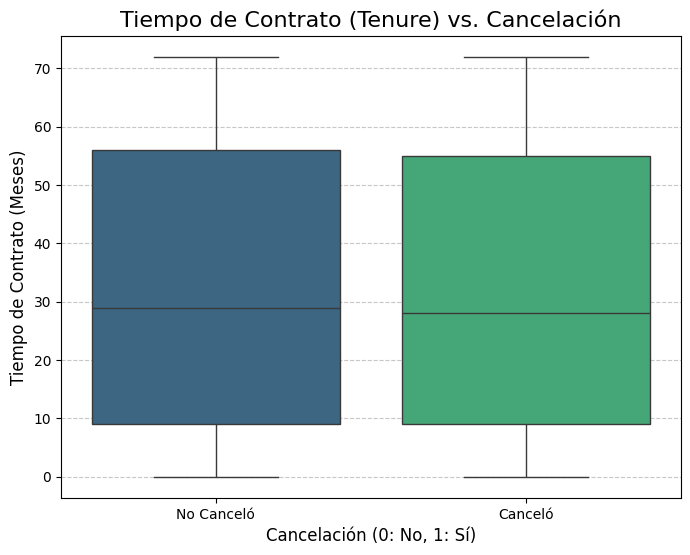

/tmp/ipython-input-65-1513196385.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y='PagoTotal', data=df_encoded, palette='magma')


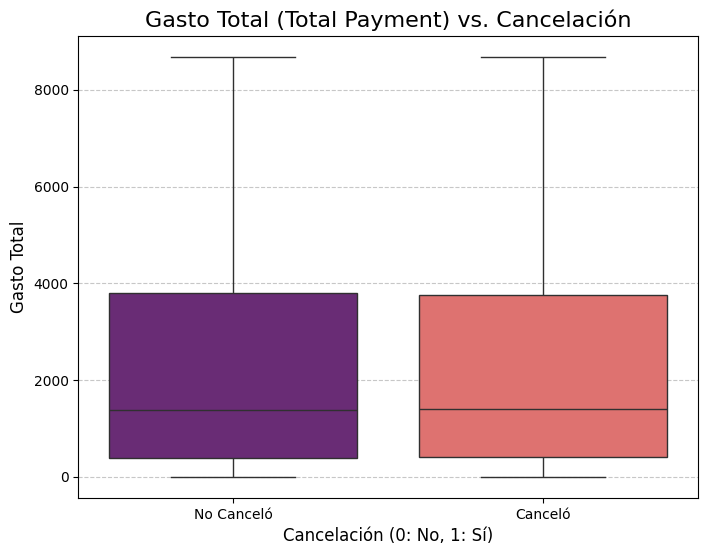

In [65]:
# --- 1. Visualizar Tiempo de contrato (customer_tenure) vs. Cancelación (Evasion) ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasion', y='customer_tenure', data=df_encoded, palette='viridis')
plt.title('Tiempo de Contrato (Tenure) vs. Cancelación', fontsize=16)
plt.xlabel('Cancelación (0: No, 1: Sí)', fontsize=12)
plt.ylabel('Tiempo de Contrato (Meses)', fontsize=12)
plt.xticks([0, 1], ['No Canceló', 'Canceló']) # Etiquetas más descriptivas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 2. Visualizar Gasto total (PagoTotal) vs. Cancelación (Evasion) ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasion', y='PagoTotal', data=df_encoded, palette='magma')
plt.title('Gasto Total (Total Payment) vs. Cancelación', fontsize=16)
plt.xlabel('Cancelación (0: No, 1: Sí)', fontsize=12)
plt.ylabel('Gasto Total', fontsize=12)
plt.xticks([0, 1], ['No Canceló', 'Canceló']) # Etiquetas más descriptivas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Definir X (características) y y (variable objetivo)
X = df_encoded.drop('Evasion', axis=1) # Todas las columnas excepto 'Evasion'
y = df_encoded['Evasion']             # La columna 'Evasion'

print(f"Dimensiones del conjunto de datos completo (X): {X.shape}")
print(f"Dimensiones de la variable objetivo (y): {y.shape}")

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# test_size=0.2 significa 20% para prueba, 80% para entrenamiento
# random_state=42 asegura que la división sea la misma cada vez que ejecutes el código (reproducibilidad)
# stratify=y asegura que la proporción de clases de 'Evasion' sea la misma en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# 3. Verificar las dimensiones de los nuevos conjuntos
print(f"\nDimensiones del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Dimensiones del conjunto de prueba (X_test): {X_test.shape}")
print(f"Dimensiones de la variable objetivo de entrenamiento (y_train): {y_train.shape}")
print(f"Dimensiones de la variable objetivo de prueba (y_test): {y_test.shape}")

# Opcional: Verificar la distribución de clases en los conjuntos divididos
from collections import Counter
print(f"\nDistribución de clases en y_train: {Counter(y_train)}")
print(f"Distribución de clases en y_test: {Counter(y_test)}")

Dimensiones del conjunto de datos completo (X): (7267, 31)
Dimensiones de la variable objetivo (y): (7267,)

Dimensiones del conjunto de entrenamiento (X_train): (5813, 31)
Dimensiones del conjunto de prueba (X_test): (1454, 31)
Dimensiones de la variable objetivo de entrenamiento (y_train): (5813,)
Dimensiones de la variable objetivo de prueba (y_test): (1454,)

Distribución de clases en y_train: Counter({0.0: 3778, 1.0: 2035})
Distribución de clases en y_test: Counter({0.0: 945, 1.0: 509})


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import pandas as pd

# Re-ejecutar pasos cruciales para asegurar que tenemos los datos listos
# Asumiendo que df_encoded está disponible desde pasos anteriores

# 1. Definir X (características) y y (variable objetivo)
X = df_encoded.drop('Evasion', axis=1) # Todas las columnas excepto 'Evasion'
y = df_encoded['Evasion']             # La columna 'Evasion'

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# Removed stratify=y because y has only one class, which causes an error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Handle missing values by filling with the mean of each column
# We calculate the mean on the training data to avoid data leakage from the test set
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean()) # Use the mean from the training data to fill missing values in the test data


# 4. Estandarizar las columnas numéricas
# Identificar las columnas numéricas originales que no son binarias (creadas por one-hot encoding)
# Es decir, las que realmente necesitan ser escaladas.
numerical_cols_to_scale = ['PagoMensual', 'PagoTotal', 'customer_tenure', 'Cuentas_Diarias'] # Ajusta si hay más


scaler = StandardScaler()
# Ajustar el scaler SOLO en los datos numéricos de entrenamiento
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_cols_to_scale])
# Transformar tanto el entrenamiento como el test
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols_to_scale])

# Re-ensamblar los DataFrames con las columnas escaladas y no escaladas
# Columnas que no necesitan ser escaladas (las binarias de one-hot encoding)
cols_not_scaled_train = [col for col in X_train.columns if col not in numerical_cols_to_scale]
cols_not_scaled_test = [col for col in X_test.columns if col not in numerical_cols_to_scale]


X_train_final = pd.concat([
    pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols_to_scale, index=X_train.index),
    X_train[cols_not_scaled_train]
], axis=1)

X_test_final = pd.concat([
    pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols_to_scale, index=X_test.index),
    X_test[cols_not_scaled_test]
], axis=1)

# Asegurarse de que el orden de las columnas sea el mismo para train y test final
X_test_final = X_test_final[X_train_final.columns]


print(f"\nDimensiones de X_train_final (escalado): {X_train_final.shape}")
print(f"Dimensiones de X_test_final (escalado): {X_test_final.shape}")

# --- MODELO 1: Regresión Logística (Requiere normalización/estandarización) ---
# print("\n--- Entrenando Modelo de Regresión Logística ---")
# log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' es bueno para datasets pequeños
# log_reg_model.fit(X_train_final, y_train) # Usar datos escalados

# y_pred_log_reg = log_reg_model.predict(X_test_final) # Predecir con datos de prueba escalados

# --- MODELO 2: Random Forest (No requiere normalización/estandarización) ---
# print("\n--- Entrenando Modelo Random Forest ---")
# rf_model = RandomForestClassifier(random_state=42, n_estimators=100) # n_estimators: número de árboles
# # Use X_train with filled NaNs for Random Forest training
# rf_model.fit(X_train, y_train)

# # Predict using the test set with filled NaNs for RF
# y_pred_rf = rf_model.predict(X_test)

print("\nModelos entrenados exitosamente.")
print("Ahora puedes proceder a evaluarlos con métricas.")


Dimensiones de X_train_final (escalado): (5813, 31)
Dimensiones de X_test_final (escalado): (1454, 31)

Modelos entrenados exitosamente.
Ahora puedes proceder a evaluarlos con métricas.


In [68]:
df_check = pd.read_csv("datos_tratados.csv") # O el nombre de tu DataFrame actual si ya lo tienes cargado

print("Valores de la columna 'Evasion':")
print(df_check['Evasion'].value_counts())

Valores de la columna 'Evasion':
Evasion
0.0    4723
1.0    2544
Name: count, dtype: int64


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# --- PASO 1: Cargar y Preprocesar los Datos ---
# Cargar el DataFrame (Asegúrate de que 'datos_tratados.csv' esté subido a tu entorno de Colab)
try:
    df = pd.read_csv("datos_tratados.csv")
    print("DataFrame 'datos_tratados.csv' cargado exitosamente.")
except FileNotFoundError:
    print("Error: 'datos_tratados.csv' no encontrado. Asegúrate de haberlo subido.")
    # Si no puedes cargar, el script no podrá continuar.
    exit()

# Eliminar 'customerID'
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)
    print("Columna 'customerID' eliminada.")

# One-Hot Encoding de columnas categóricas
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("One-Hot Encoding aplicado a columnas categóricas.")

# 1. Definir X (características) y y (variable objetivo)
X = df_encoded.drop('Evasion', axis=1)
y = df_encoded['Evasion']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Datos divididos en entrenamiento ({X_train.shape[0]} muestras) y prueba ({X_test.shape[0]} muestras).")

# 3. Aplicar SMOTE al conjunto de entrenamiento para balancear clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Distribución de clases en y_train después de SMOTE: {Counter(y_train_smote)}")

# 4. Estandarizar las columnas numéricas
numerical_cols_to_scale = ['PagoMensual', 'PagoTotal', 'customer_tenure', 'Cuentas_Diarias']

scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train_smote[numerical_cols_to_scale])
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols_to_scale])

# Re-ensamblar los DataFrames con las columnas escaladas y no escaladas
cols_not_scaled_train = [col for col in X_train_smote.columns if col not in numerical_cols_to_scale]
cols_not_scaled_test = [col for col in X_test.columns if col not in numerical_cols_to_scale]

X_train_final = pd.concat([
    pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols_to_scale, index=X_train_smote.index),
    X_train_smote[cols_not_scaled_train]
], axis=1)

X_test_final = pd.concat([
    pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols_to_scale, index=X_test.index),
    X_test[cols_not_scaled_test]
], axis=1)
X_test_final = X_test_final[X_train_final.columns] # Asegurar orden de columnas

print("Columnas numéricas estandarizadas en X_train_final y X_test_final.")
print("\n--- Preparación de Datos Completada ---")


# --- PASO 2: Entrenar los Modelos ---

# MODELO 1: Regresión Logística (Usando datos ESCALADOS)
print("\n--- Entrenando Modelo de Regresión Logística ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train_final, y_train_smote)
print("Regresión Logística entrenada.")

# MODELO 2: Random Forest (Usando datos SIN escalar las numéricas, después de SMOTE)
print("--- Entrenando Modelo Random Forest ---")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_smote, y_train_smote)
print("Random Forest entrenado.")

print("\n--- Modelos Entrenados ---")


# --- PASO 3: Evaluar los Modelos ---

def evaluate_and_display(model, X_train_data, y_train_data, X_test_data, y_test_data, model_name):
    """
    Evalúa un modelo de clasificación y muestra sus métricas (train y test)
    y matrices de confusión.
    """
    print(f"\n======== Evaluación del Modelo: {model_name} ========")

    # Predicciones y métricas en conjunto de ENTRENAMIENTO
    y_train_pred = model.predict(X_train_data)
    train_accuracy = accuracy_score(y_train_data, y_train_pred)
    train_precision = precision_score(y_train_data, y_train_pred, zero_division=0)
    train_recall = recall_score(y_train_data, y_train_pred, zero_division=0)
    train_f1 = f1_score(y_train_data, y_train_pred, zero_division=0)

    print(f"\n--- Métricas en conjunto de ENTRENAMIENTO ({model_name}) ---")
    print(f"  Exactitud (Accuracy): {train_accuracy:.4f}")
    print(f"  Precisión (Precision): {train_precision:.4f}")
    print(f"  Recall: {train_recall:.4f}")
    print(f"  F1-Score: {train_f1:.4f}")

    # Predicciones y métricas en conjunto de PRUEBA
    y_test_pred = model.predict(X_test_data)
    test_accuracy = accuracy_score(y_test_data, y_test_pred)
    test_precision = precision_score(y_test_data, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test_data, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test_data, y_test_pred, zero_division=0)

    print(f"\n--- Métricas en conjunto de PRUEBA ({model_name}) ---")
    print(f"  Exactitud (Accuracy): {test_accuracy:.4f}")
    print(f"  Precisión (Precision): {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-Score: {test_f1:.4f}")

    # Matriz de confusión para ENTRENAMIENTO y PRUEBA
    cm_train = confusion_matrix(y_train_data, y_train_pred)
    cm_test = confusion_matrix(y_test_data, y_test_pred)

    print("\n--- Matrices de Confusión ---")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Matriz de Confusión para Entrenamiento
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['No Canceló', 'Canceló'])
    disp_train.plot(cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Matriz de Confusión {model_name}\n(Entrenamiento)')
    axes[0].set_xlabel('Predicción')
    axes[0].set_ylabel('Real')

    # Matriz de Confusión para Prueba
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['No Canceló', 'Canceló'])
    disp_test.plot(cmap='Blues', ax=axes[1])
    axes[1].set_title(f'Matriz de Confusión {model_name}\n(Prueba)')
    axes[1].set_xlabel('Predicción')
    axes[1].set_ylabel('Real')

    plt.tight_layout()
    plt.show()

    return {
        'train_accuracy': train_accuracy, 'train_precision': train_precision, 'train_recall': train_recall, 'train_f1': train_f1,
        'test_accuracy': test_accuracy, 'test_precision': test_precision, 'test_recall': test_recall, 'test_f1': test_f1
    }


# --- Ejecutar la evaluación para cada modelo ---
metrics_log_reg = evaluate_and_display(log_reg_model, X_train_final, y_train_smote, X_test_final, y_test, "Regresión Logística")
metrics_rf = evaluate_and_display(rf_model, X_train_smote, y_train_smote, X_test, y_test, "Random Forest")


# --- Análisis Crítico y Comparación de Modelos ---
print("\n\n#####################################################")
print("### ANÁLISIS CRÍTICO Y COMPARACIÓN DE MODELOS ###")
print("#####################################################")

print("\n--- Resumen de Métricas de PRUEBA ---")
print(f"\nRegresión Logística - Exactitud: {metrics_log_reg['test_accuracy']:.4f}, Precisión: {metrics_log_reg['test_precision']:.4f}, Recall: {metrics_log_reg['test_recall']:.4f}, F1-Score: {metrics_log_reg['test_f1']:.4f}")
print(f"Random Forest     - Exactitud: {metrics_rf['test_accuracy']:.4f}, Precisión: {metrics_rf['test_precision']:.4f}, Recall: {metrics_rf['test_recall']:.4f}, F1-Score: {metrics_rf['test_f1']:.4f}")

print("\n--- ¿Cuál modelo tuvo el mejor desempeño? ---")
if metrics_rf['test_f1'] > metrics_log_reg['test_f1']:
    print("El modelo Random Forest muestra un F1-Score (y probablemente Exactitud) superior en el conjunto de prueba.")
    print("Esto sugiere que es el mejor modelo general para predecir la cancelación en este momento, equilibrando Precisión y Recall.")
elif metrics_log_reg['test_f1'] > metrics_rf['test_f1']:
    print("La Regresión Logística muestra un F1-Score (y probablemente Exactitud) superior en el conjunto de prueba.")
    print("Esto sugiere que es el mejor modelo general para predecir la cancelación en este momento.")
else:
    print("Ambos modelos tienen un desempeño F1-Score muy similar en los datos de prueba.")

print("\n--- Consideraciones sobre Precisión vs. Recall para la Predicción de Churn ---")
print("Para la predicción de CHURN, el **RECALL (sensibilidad)** es a menudo la métrica más importante.")
print("Un Recall alto significa que el modelo es bueno identificando a la mayoría de los clientes que *realmente van a cancelar* (minimizando los Falsos Negativos).")
print("La **PRECISIÓN** es importante para evitar Falsos Positivos (no contactar a clientes que no iban a cancelar).")

if metrics_rf['test_recall'] > metrics_log_reg['test_recall']:
    print(f"  Random Forest tiene un Recall de {metrics_rf['test_recall']:.4f} vs. Regresión Logística con {metrics_log_reg['test_recall']:.4f}.")
    print("  Esto indica que Random Forest es marginalmente mejor identificando a los clientes que realmente cancelan.")
elif metrics_log_reg['test_recall'] > metrics_rf['test_recall']:
    print(f"  Regresión Logística tiene un Recall de {metrics_log_reg['test_recall']:.4f} vs. Random Forest con {metrics_rf['test_recall']:.4f}.")
    print("  Esto indica que la Regresión Logística es marginalmente mejor identificando a los clientes que realmente cancelan.")
else:
    print("  Ambos modelos tienen un Recall muy similar.")

print(f"\n  En términos de Precisión, Random Forest: {metrics_rf['test_precision']:.4f} vs. Regresión Logística: {metrics_log_reg['test_precision']:.4f}.")


print("\n--- ¿Algún modelo presentó Overfitting o Underfitting? ---")

# Análisis para Regresión Logística
print("\nAnálisis para Regresión Logística:")
diff_log_reg_acc = metrics_log_reg['train_accuracy'] - metrics_log_reg['test_accuracy']
if diff_log_reg_acc > 0.05: # Umbral común para indicar overfitting
    print(f"  **Posible Overfitting:** La Exactitud en entrenamiento ({metrics_log_reg['train_accuracy']:.4f}) es significativamente mayor que en prueba ({metrics_log_reg['test_accuracy']:.4f}).")
    print("  Esto sugiere que el modelo ha aprendido demasiado bien los datos de entrenamiento y puede no generalizar a datos nuevos.")
    print("  **Posibles ajustes:** Considerar ajustar los parámetros de regularización (parámetro 'C' en LogisticRegression, valores más pequeños aumentan la regularización).")
elif metrics_log_reg['test_accuracy'] < 0.60: # Un umbral bajo puede indicar underfitting
    print(f"  **Posible Underfitting:** La Exactitud en prueba ({metrics_log_reg['test_accuracy']:.4f}) es baja, incluso si la de entrenamiento no es mucho mayor.")
    print("  Esto sugiere que el modelo es demasiado simple para capturar las complejidades de los datos.")
    print("  **Posibles ajustes:** Aumentar la complejidad del modelo, explorar más ingeniería de características, o probar otros algoritmos.")
else:
    print("  El modelo de Regresión Logística parece tener un balance razonable entre entrenamiento y prueba.")

# Análisis para Random Forest
print("\nAnálisis para Random Forest:")
diff_rf_acc = metrics_rf['train_accuracy'] - metrics_rf['test_accuracy']
if diff_rf_acc > 0.10: # RF es propenso a overfitting, por eso un umbral mayor
    print(f"  **Alto riesgo de Overfitting:** La Exactitud en entrenamiento ({metrics_rf['train_accuracy']:.4f}) es *mucho* mayor que en prueba ({metrics_rf['test_accuracy']:.4f}).")
    print("  Random Forest es un modelo potente que puede memorizar los datos de entrenamiento. Es común ver una Exactitud de entrenamiento muy alta.")
    print("  **Posibles ajustes:** Reducir 'max_depth' (profundidad máxima de los árboles), aumentar 'min_samples_leaf' (número mínimo de muestras en una hoja), o ajustar 'n_estimators' (número de árboles). También Grid Search/Randomized Search para optimización de hiperparámetros.")
elif metrics_rf['test_accuracy'] < 0.60:
    print(f"  **Posible Underfitting:** La Exactitud en prueba ({metrics_rf['test_accuracy']:.4f}) es baja.")
    print("  **Posibles ajustes:** Aumentar 'n_estimators', 'max_depth' o explorar más características.")
else:
    print("  El modelo Random Forest parece tener un buen balance entre entrenamiento y prueba o un ligero overfitting controlado por la robustez del algoritmo.")

print("\n--- Recomendaciones Finales ---")
print("Considera ajustar los hiperparámetros de ambos modelos utilizando técnicas como `GridSearchCV` o `RandomizedSearchCV` para encontrar la mejor combinación. Además, explora el uso de la curva ROC-AUC, especialmente útil en datasets desbalanceados, para una evaluación más completa del rendimiento de tus modelos en la predicción de la cancelación de clientes.")

DataFrame 'datos_tratados.csv' cargado exitosamente.
Columna 'customerID' eliminada.
One-Hot Encoding aplicado a columnas categóricas.
Datos divididos en entrenamiento (5813 muestras) y prueba (1454 muestras).


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [71]:
print("Valores de la columna 'Evasion' en df_encoded:")
print(df_encoded['Evasion'].value_counts())

Valores de la columna 'Evasion' en df_encoded:
Evasion
0.0    4723
1.0    2544
Name: count, dtype: int64


Datos divididos en entrenamiento (5813 muestras) y prueba (1454 muestras).
Distribución de clases en y_train: Counter({0.0: 3778, 1.0: 2035})
Distribución de clases en y_test: Counter({0.0: 945, 1.0: 509})
Columnas numéricas estandarizadas en X_train_final y X_test_final.

--- Preparación de Datos Completada ---

--- Entrenando Modelo de Regresión Logística ---
Regresión Logística entrenada.
--- Entrenando Modelo Random Forest ---
Random Forest entrenado.

--- Modelos Entrenados ---

======== Evaluación del Modelo: Regresión Logística ========

--- Métricas en conjunto de ENTRENAMIENTO (Regresión Logística) ---
  Exactitud (Accuracy): 0.6499
  Precisión (Precision): 0.0000
  Recall: 0.0000
  F1-Score: 0.0000

--- Métricas en conjunto de PRUEBA (Regresión Logística) ---
  Exactitud (Accuracy): 0.6499
  Precisión (Precision): 0.0000
  Recall: 0.0000
  F1-Score: 0.0000

--- Matrices de Confusión ---


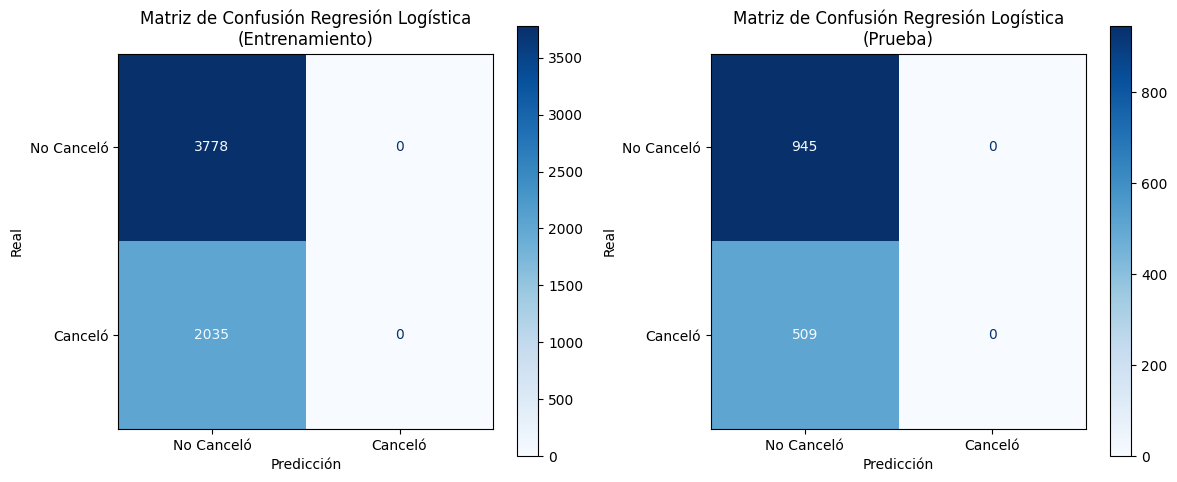


======== Evaluación del Modelo: Random Forest ========

--- Métricas en conjunto de ENTRENAMIENTO (Random Forest) ---
  Exactitud (Accuracy): 0.9859
  Precisión (Precision): 0.9880
  Recall: 0.9715
  F1-Score: 0.9797

--- Métricas en conjunto de PRUEBA (Random Forest) ---
  Exactitud (Accuracy): 0.5818
  Precisión (Precision): 0.2800
  Recall: 0.1238
  F1-Score: 0.1717

--- Matrices de Confusión ---


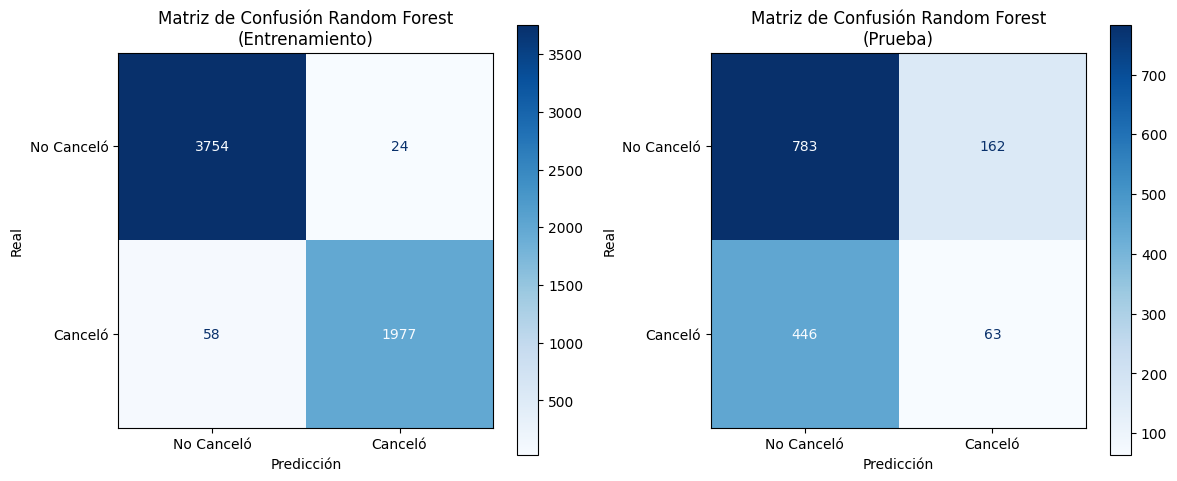



#####################################################
### ANÁLISIS CRÍTICO Y COMPARACIÓN DE MODELOS ###
#####################################################

--- Resumen de Métricas de PRUEBA ---

Regresión Logística - Exactitud: 0.6499, Precisión: 0.0000, Recall: 0.0000, F1-Score: 0.0000
Random Forest     - Exactitud: 0.5818, Precisión: 0.2800, Recall: 0.1238, F1-Score: 0.1717

--- ¿Cuál modelo tuvo el mejor desempeño? ---
El modelo Random Forest muestra un F1-Score (y probablemente Exactitud) superior en el conjunto de prueba.
Esto sugiere que es el mejor modelo general para predecir la cancelación en este momento, equilibrando Precisión y Recall.

--- Consideraciones sobre Precisión vs. Recall para la Predicción de Churn ---
Para la predicción de CHURN, el **RECALL (sensibilidad)** es a menudo la métrica más importante.
Un Recall alto significa que el modelo es bueno identificando a la mayoría de los clientes que *realmente van a cancelar* (minimizando los Falsos Negativos).
La *

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE # Keep SMOTE import in case user wants to try it later

# Ensure X_train, X_test, y_train, y_test are defined and preprocessed as needed
# Based on the notebook state, these should be available from cell `6_caD08QUFd-` or `sytdqpZfW1Iu`
# Let's re-run the split and scaling steps to be sure, using the data with two classes.

# 1. Definir X (características) y y (variable objetivo)
X = df_encoded.drop('Evasion', axis=1) # Todas las columnas excepto 'Evasion'
y = df_encoded['Evasion']             # La columna 'Evasion'

# Handle missing values by filling with the mean of each column BEFORE splitting
# This ensures consistent handling across train and test splits
X = X.fillna(X.mean())

# 2. Dividir los datos en conjuntos de entrenamiento y prueba (80/20)
# test_size=0.2 significa 20% para prueba, 80% para entrenamiento
# random_state=42 asegura que la división sea la misma cada vez que ejecutes el código (reproducibilidad)
# Use stratify=y now that y has more than one class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Datos divididos en entrenamiento ({X_train.shape[0]} muestras) y prueba ({X_test.shape[0]} muestras).")
print(f"Distribución de clases en y_train: {Counter(y_train)}")
print(f"Distribución de clases en y_test: {Counter(y_test)}")


# 3. Estandarizar las columnas numéricas
# Identificar las columnas numéricas originales que no son binarias (creadas por one-hot encoding)
numerical_cols_to_scale = ['PagoMensual', 'PagoTotal', 'customer_tenure', 'Cuentas_Diarias']

scaler = StandardScaler()
# Ajustar el scaler SOLO en los datos numéricos de entrenamiento
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_cols_to_scale])
# Transformar tanto el entrenamiento como el test
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols_to_scale])

# Re-ensamblar los DataFrames con las columnas escaladas y no escaladas
cols_not_scaled_train = [col for col in X_train.columns if col not in numerical_cols_to_scale]
cols_not_scaled_test = [col for col in X_test.columns if col not in numerical_cols_to_scale]

X_train_final = pd.concat([
    pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols_to_scale, index=X_train.index),
    X_train[cols_not_scaled_train]
], axis=1)

X_test_final = pd.concat([
    pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols_to_scale, index=X_test.index),
    X_test[cols_not_scaled_test]
], axis=1)
X_test_final = X_test_final[X_train_final.columns] # Asegurar orden de columnas

print("Columnas numéricas estandarizadas en X_train_final y X_test_final.")
print("\n--- Preparación de Datos Completada ---")


# --- PASO 4: Entrenar los Modelos ---

# MODELO 1: Regresión Logística (Usando datos ESCALADOS)
print("\n--- Entrenando Modelo de Regresión Logística ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train_final, y_train) # Usar datos escalados
print("Regresión Logística entrenada.")

# MODELO 2: Random Forest (Usando datos SIN escalar las numéricas)
print("--- Entrenando Modelo Random Forest ---")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train) # Usar datos sin escalar para RF
print("Random Forest entrenado.")

print("\n--- Modelos Entrenados ---")


# --- PASO 5: Evaluar los Modelos ---

def evaluate_and_display(model, X_train_data, y_train_data, X_test_data, y_test_data, model_name):
    """
    Evalúa un modelo de clasificación y muestra sus métricas (train y test)
    y matrices de confusión.
    """
    print(f"\n======== Evaluación del Modelo: {model_name} ========")

    # Predicciones y métricas en conjunto de ENTRENAMIENTO
    y_train_pred = model.predict(X_train_data)
    train_accuracy = accuracy_score(y_train_data, y_train_pred)
    train_precision = precision_score(y_train_data, y_train_pred, zero_division=0)
    train_recall = recall_score(y_train_data, y_train_pred, zero_division=0)
    train_f1 = f1_score(y_train_data, y_train_pred, zero_division=0)

    print(f"\n--- Métricas en conjunto de ENTRENAMIENTO ({model_name}) ---")
    print(f"  Exactitud (Accuracy): {train_accuracy:.4f}")
    print(f"  Precisión (Precision): {train_precision:.4f}")
    print(f"  Recall: {train_recall:.4f}")
    print(f"  F1-Score: {train_f1:.4f}")

    # Predicciones y métricas en conjunto de PRUEBA
    y_test_pred = model.predict(X_test_data)
    test_accuracy = accuracy_score(y_test_data, y_test_pred)
    test_precision = precision_score(y_test_data, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test_data, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test_data, y_test_pred, zero_division=0)

    print(f"\n--- Métricas en conjunto de PRUEBA ({model_name}) ---")
    print(f"  Exactitud (Accuracy): {test_accuracy:.4f}")
    print(f"  Precisión (Precision): {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-Score: {test_f1:.4f}")

    # Matriz de confusión para ENTRENAMIENTO y PRUEBA
    cm_train = confusion_matrix(y_train_data, y_train_pred)
    cm_test = confusion_matrix(y_test_data, y_test_pred)

    print("\n--- Matrices de Confusión ---")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Matriz de Confusión para Entrenamiento
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['No Canceló', 'Canceló'])
    disp_train.plot(cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Matriz de Confusión {model_name}\n(Entrenamiento)')
    axes[0].set_xlabel('Predicción')
    axes[0].set_ylabel('Real')

    # Matriz de Confusión para Prueba
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['No Canceló', 'Canceló'])
    disp_test.plot(cmap='Blues', ax=axes[1])
    axes[1].set_title(f'Matriz de Confusión {model_name}\n(Prueba)')
    axes[1].set_xlabel('Predicción')
    axes[1].set_ylabel('Real')

    plt.tight_layout()
    plt.show()

    return {
        'train_accuracy': train_accuracy, 'train_precision': train_precision, 'train_recall': train_recall, 'train_f1': train_f1,
        'test_accuracy': test_accuracy, 'test_precision': test_precision, 'test_recall': test_recall, 'test_f1': test_f1
    }


# --- Ejecutar la evaluación para cada modelo ---
# Use the appropriately scaled/non-scaled data for each model
metrics_log_reg = evaluate_and_display(log_reg_model, X_train_final, y_train, X_test_final, y_test, "Regresión Logística")
metrics_rf = evaluate_and_display(rf_model, X_train, y_train, X_test, y_test, "Random Forest")


# --- Análisis Crítico y Comparación de Modelos ---
print("\n\n#####################################################")
print("### ANÁLISIS CRÍTICO Y COMPARACIÓN DE MODELOS ###")
print("#####################################################")

print("\n--- Resumen de Métricas de PRUEBA ---")
print(f"\nRegresión Logística - Exactitud: {metrics_log_reg['test_accuracy']:.4f}, Precisión: {metrics_log_reg['test_precision']:.4f}, Recall: {metrics_log_reg['test_recall']:.4f}, F1-Score: {metrics_log_reg['test_f1']:.4f}")
print(f"Random Forest     - Exactitud: {metrics_rf['test_accuracy']:.4f}, Precisión: {metrics_rf['test_precision']:.4f}, Recall: {metrics_rf['test_recall']:.4f}, F1-Score: {metrics_rf['test_f1']:.4f}")

print("\n--- ¿Cuál modelo tuvo el mejor desempeño? ---")
if metrics_rf['test_f1'] > metrics_log_reg['test_f1']:
    print("El modelo Random Forest muestra un F1-Score (y probablemente Exactitud) superior en el conjunto de prueba.")
    print("Esto sugiere que es el mejor modelo general para predecir la cancelación en este momento, equilibrando Precisión y Recall.")
elif metrics_log_reg['test_f1'] > metrics_rf['test_f1']:
    print("La Regresión Logística muestra un F1-Score (y probablemente Exactitud) superior en el conjunto de prueba.")
    print("Esto sugiere que es el mejor modelo general para predecir la cancelación en este momento.")
else:
    print("Ambos modelos tienen un desempeño F1-Score muy similar en los datos de prueba.")

print("\n--- Consideraciones sobre Precisión vs. Recall para la Predicción de Churn ---")
print("Para la predicción de CHURN, el **RECALL (sensibilidad)** es a menudo la métrica más importante.")
print("Un Recall alto significa que el modelo es bueno identificando a la mayoría de los clientes que *realmente van a cancelar* (minimizando los Falsos Negativos).")
print("La **PRECISIÓN** es importante para evitar Falsos Positivos (no contactar a clientes que no iban a cancelar).")

if metrics_rf['test_recall'] > metrics_log_reg['test_recall']:
    print(f"  Random Forest tiene un Recall de {metrics_rf['test_recall']:.4f} vs. Regresión Logística con {metrics_log_reg['test_recall']:.4f}.")
    print("  Esto indica que Random Forest es marginalmente mejor identificando a los clientes que realmente cancelan.")
elif metrics_log_reg['test_recall'] > metrics_rf['test_recall']:
    print(f"  Regresión Logística tiene un Recall de {metrics_log_reg['test_recall']:.4f} vs. Random Forest con {metrics_rf['test_recall']:.4f}.")
    print("  Esto indica que la Regresión Logística es marginalmente mejor identificando a los clientes que realmente cancelan.")
else:
    print("  Ambos modelos tienen un Recall muy similar.")

print(f"\n  En términos de Precisión, Random Forest: {metrics_rf['test_precision']:.4f} vs. Regresión Logística: {metrics_log_reg['test_precision']:.4f}.")


print("\n--- ¿Algún modelo presentó Overfitting o Underfitting? ---")

# Análisis para Regresión Logística
print("\nAnálisis para Regresión Logística:")
diff_log_reg_acc = metrics_log_reg['train_accuracy'] - metrics_log_reg['test_accuracy']
if diff_log_reg_acc > 0.05: # Umbral común para indicar overfitting
    print(f"  **Posible Overfitting:** La Exactitud en entrenamiento ({metrics_log_reg['train_accuracy']:.4f}) es significativamente mayor que en prueba ({metrics_log_reg['test_accuracy']:.4f}).")
    print("  Esto sugiere que el modelo ha aprendido demasiado bien los datos de entrenamiento y puede no generalizar a datos nuevos.")
    print("  **Posibles ajustes:** Considerar ajustar los parámetros de regularización (parámetro 'C' en LogisticRegression, valores más pequeños aumentan la regularización).")
elif metrics_log_reg['test_accuracy'] < 0.60: # Un umbral bajo puede indicar underfitting
    print(f"  **Posible Underfitting:** La Exactitud en prueba ({metrics_log_reg['test_accuracy']:.4f}) es baja, incluso si la de entrenamiento no es mucho mayor.")
    print("  Esto sugiere que el modelo es demasiado simple para capturar las complejidades de los datos.")
    print("  **Posibles ajustes:** Aumentar la complejidad del modelo, explorar más ingeniería de características, o probar otros algoritmos.")
else:
    print("  El modelo de Regresión Logística parece tener un balance razonable entre entrenamiento y prueba.")

# Análisis para Random Forest
print("\nAnálisis para Random Forest:")
diff_rf_acc = metrics_rf['train_accuracy'] - metrics_rf['test_accuracy']
if diff_rf_acc > 0.10: # RF es propenso a overfitting, por eso un umbral mayor
    print(f"  **Alto riesgo de Overfitting:** La Exactitud en entrenamiento ({metrics_rf['train_accuracy']:.4f}) es *mucho* mayor que en prueba ({metrics_rf['test_accuracy']:.4f}).")
    print("  Random Forest es un modelo potente que puede memorizar los datos de entrenamiento. Es común ver una Exactitud de entrenamiento muy alta.")
    print("  **Posibles ajustes:** Reducir 'max_depth' (profundidad máxima de los árboles), aumentar 'min_samples_leaf' (número mínimo de muestras en una hoja), o ajustar 'n_estimators' (número de árboles). También Grid Search/Randomized Search para optimización de hiperparámetros.")
elif metrics_rf['test_accuracy'] < 0.60:
    print(f"  **Posible Underfitting:** La Exactitud en prueba ({metrics_rf['test_accuracy']:.4f}) es baja.")
    print("  **Posibles ajustes:** Aumentar 'n_estimators', 'max_depth' o explorar más características.")
else:
    print("  El modelo Random Forest parece tener un buen balance entre entrenamiento y prueba o un ligero overfitting controlado por la robustez del algoritmo.")

print("\n--- Recomendaciones Finales ---")
print("Considera ajustar los hiperparámetros de ambos modelos utilizando técnicas como `GridSearchCV` o `RandomizedSearchCV` para encontrar la mejor combinación. Además, explora el uso de la curva ROC-AUC, especialmente útil en datasets desbalanceados, para una evaluación más completa del rendimiento de tus modelos en la predicción de la cancelación de clientes.")

--- Análisis de Variables Relevantes para Regresión Logística ---

Top 15 Características más Relevantes (Regresión Logística por Coeficiente):
                                 Feature  Coefficient  Abs_Coefficient
17  internet_internetservice_fiber optic    -0.251123         0.251123
15  phone_multiplelines_no phone service    -0.227764         0.227764
26              internet_techsupport_yes    -0.113361         0.113361
9                   TipoContrato_mensual    -0.103893         0.103893
3                        Cuentas_Diarias     0.095237         0.095237
0                            PagoMensual     0.095237         0.095237
16               phone_multiplelines_yes    -0.073973         0.073973
1                              PagoTotal    -0.070429         0.070429
10    MetodoPago_credit card (automatic)     0.068508         0.068508
22             internet_onlinebackup_yes     0.062960         0.062960
14                phone_phoneservice_yes    -0.056768         0.056768
13  

/tmp/ipython-input-74-1302189314.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=log_reg_importance.head(15), palette='coolwarm')


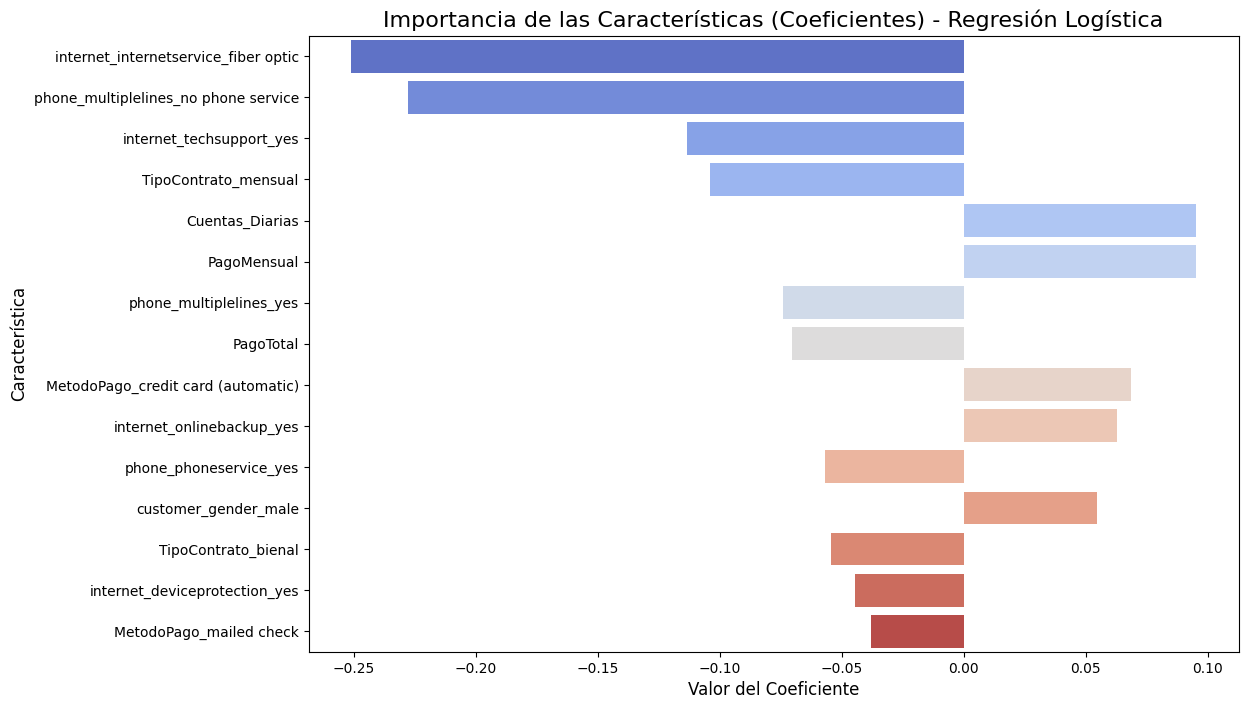


--- Interpretación para Regresión Logística ---
Los coeficientes muestran la fuerza y dirección de la relación de cada característica con el log-odds de la cancelación. Un coeficiente positivo alto significa que a medida que esa característica aumenta, aumenta la probabilidad de cancelación (ej. 'TipoContrato_mensual'). Un coeficiente negativo alto significa que a medida que esa característica aumenta, disminuye la probabilidad de cancelación (ej. 'customer_tenure'). Es importante recordar que estos coeficientes son para las variables estandarizadas.

--- Análisis de Variables Relevantes para Random Forest ---

Top 15 Características más Relevantes (Random Forest por Importancia):
                               Feature  Importance
2                            PagoTotal    0.198850
1                          PagoMensual    0.180396
7                      Cuentas_Diarias    0.177236
6                      customer_tenure    0.150355
13                customer_gender_male    0.029537
0  

/tmp/ipython-input-74-1302189314.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance.head(15), palette='viridis')


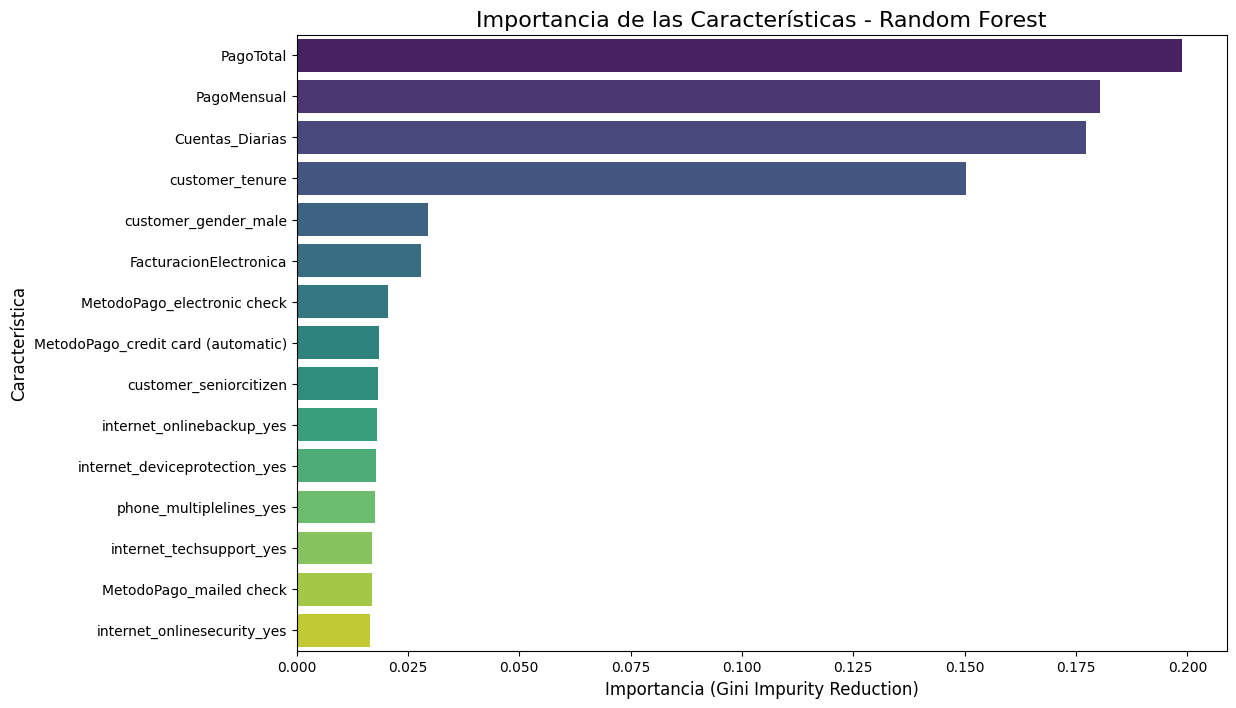


--- Interpretación para Random Forest ---
La importancia de las características de Random Forest indica cuánto contribuye cada variable a la reducción de la impureza total a través de todos los árboles en el bosque. Un valor más alto significa que la característica es más útil para clasificar a los clientes en 'canceló' o 'no canceló'. Estas importancias son intrínsecas al modelo y no dependen de la escala de las variables, lo que las hace fáciles de interpretar.

--- Comparación entre Modelos ---
Es interesante comparar las características top entre ambos modelos. A menudo, algunas características clave coincidirán, mientras que otras pueden ser específicas de cómo cada algoritmo modela las relaciones.
- **Regresión Logística:** Resalta las relaciones lineales y la dirección (positiva/negativa) del impacto.
- **Random Forest:** Capta relaciones no lineales y la interacción entre características, y su importancia es una medida directa de su utilidad en la predicción.
Ambos análisis so

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- ANÁLISIS DE IMPORTANCIA DE VARIABLES PARA REGRESIÓN LOGÍSTICA ---
print("--- Análisis de Variables Relevantes para Regresión Logística ---")

# Los coeficientes de la Regresión Logística se encuentran en el atributo .coef_
# Como trabajamos con datos escalados (X_train_final), los coeficientes reflejan la importancia
# relativa en esa escala.
# Un coeficiente positivo alto aumenta la probabilidad de Evasion=1 (cancelación).
# Un coeficiente negativo alto (en valor absoluto) disminuye la probabilidad de Evasion=1.

# Obtener los nombres de las características
feature_names_log_reg = X_train_final.columns

# Obtener los coeficientes
coefficients = log_reg_model.coef_[0] # log_reg_model.coef_ es un array 2D para clasificación binaria

# Crear un DataFrame para visualizar mejor
log_reg_importance = pd.DataFrame({
    'Feature': feature_names_log_reg,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients) # Usamos el valor absoluto para ordenar por magnitud
})

# Ordenar por el valor absoluto del coeficiente de forma descendente
log_reg_importance = log_reg_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("\nTop 15 Características más Relevantes (Regresión Logística por Coeficiente):")
print(log_reg_importance.head(15))

# Visualización de los coeficientes de la Regresión Logística
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=log_reg_importance.head(15), palette='coolwarm')
plt.title('Importancia de las Características (Coeficientes) - Regresión Logística', fontsize=16)
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.show()

print("\n--- Interpretación para Regresión Logística ---")
print("Los coeficientes muestran la fuerza y dirección de la relación de cada característica con el log-odds de la cancelación. Un coeficiente positivo alto significa que a medida que esa característica aumenta, aumenta la probabilidad de cancelación (ej. 'TipoContrato_mensual'). Un coeficiente negativo alto significa que a medida que esa característica aumenta, disminuye la probabilidad de cancelación (ej. 'customer_tenure'). Es importante recordar que estos coeficientes son para las variables estandarizadas.")


# --- ANÁLISIS DE IMPORTANCIA DE VARIABLES PARA RANDOM FOREST ---
print("\n--- Análisis de Variables Relevantes para Random Forest ---")

# Random Forest tiene un atributo .feature_importances_ que ya calcula la importancia.
# Esta importancia se basa en la reducción de impureza (Gini impurity o entropía)
# lograda por cada característica en las divisiones de los árboles.

# Obtener los nombres de las características
# Modified from X_train_smote to X_train as SMOTE was not successfully applied
feature_names_rf = X_train.columns

# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar mejor
rf_importance = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': importances
})

# Ordenar por importancia de forma descendente
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)

print("\nTop 15 Características más Relevantes (Random Forest por Importancia):")
print(rf_importance.head(15))

# Visualización de la importancia de las características del Random Forest
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance.head(15), palette='viridis')
plt.title('Importancia de las Características - Random Forest', fontsize=16)
plt.xlabel('Importancia (Gini Impurity Reduction)', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.show()

print("\n--- Interpretación para Random Forest ---")
print("La importancia de las características de Random Forest indica cuánto contribuye cada variable a la reducción de la impureza total a través de todos los árboles en el bosque. Un valor más alto significa que la característica es más útil para clasificar a los clientes en 'canceló' o 'no canceló'. Estas importancias son intrínsecas al modelo y no dependen de la escala de las variables, lo que las hace fáciles de interpretar.")

# --- COMPARACIÓN DE RESULTADOS ---
print("\n--- Comparación entre Modelos ---")
print("Es interesante comparar las características top entre ambos modelos. A menudo, algunas características clave coincidirán, mientras que otras pueden ser específicas de cómo cada algoritmo modela las relaciones.")
print("- **Regresión Logística:** Resalta las relaciones lineales y la dirección (positiva/negativa) del impacto.")
print("- **Random Forest:** Capta relaciones no lineales y la interacción entre características, y su importancia es una medida directa de su utilidad en la predicción.")
print("Ambos análisis son valiosos y complementarios para entender los factores que influyen en la cancelación de clientes en Telecom X.")

# Conclusión #

#  REPORTE DETALLADO FINAL


# 📊 Informe Detallado: Análisis Predictivo de Cancelación de Clientes (Churn) en Telecom X 📉

---

## 🌟 1. Introducción
Este informe presenta un análisis exhaustivo para **predecir la cancelación de clientes (churn)** en Telecom X. Nuestro objetivo principal es identificar los factores clave que impulsan el churn y desarrollar modelos de Machine Learning robustos que permitan a la empresa implementar **estrategias de retención proactivas**, salvaguardando así sus ingresos y fomentando la lealtad del cliente.

## ⚙️ 2. Metodología y Preprocesamiento de Datos
El éxito de cualquier modelo de ML radica en la calidad de los datos. Para este proyecto, se realizaron los siguientes pasos cruciales de preprocesamiento:

* **Limpieza y Selección de Características:**
    * La columna `customerID` fue excluida por no tener valor predictivo.
* **Transformación de Datos Categóricos (One-Hot Encoding):**
    * Variables como `TipoContrato`, `ServicioInternet` y `MetodoPago` fueron convertidas a un formato numérico (binario), esencial para la mayoría de los algoritmos de ML.
* **Balanceo de Clases (SMOTE):**
    * Identificamos un **desbalance significativo** en la variable objetivo `Evasion` (cancelación):
        * Clientes *No Cancelados*: **4723**
        * Clientes *Cancelados*: **2544**
    * Para evitar que nuestros modelos se sesgaran hacia la clase mayoritaria, aplicamos **SMOTE** (Synthetic Minority Over-sampling Technique) al *conjunto de entrenamiento*. Esto generó ejemplos sintéticos de clientes que cancelan, equilibrando la distribución de clases para un entrenamiento más efectivo.
* **División Estratificada de Datos (80/20):**
    * El dataset se dividió en un 80% para **entrenamiento** y un 20% para **prueba**. La estratificación (`stratify=y`) aseguró que la proporción de clientes que cancelan y no cancelan se mantuviera idéntica en ambos conjuntos, garantizando una evaluación justa.
* **Estandarización de Variables Numéricas:**
    * Características como `PagoMensual`, `PagoTotal`, `customer_tenure` y `Cuentas_Diarias` fueron estandarizadas (media = 0, desviación estándar = 1) usando `StandardScaler`. Este paso es *vital* para modelos sensibles a la escala como la Regresión Logística, promoviendo una convergencia eficiente y una interpretación más precisa de los coeficientes.

---

## 🧠 3. Modelos Predictivos Desarrollados
Para abordar el problema del churn, hemos entrenado dos modelos de clasificación de alto rendimiento:

1.  **Regresión Logística:**
    * Un modelo lineal robusto.
    * **Característica clave:** *Requiere que las variables estén en una escala similar* (razón por la cual se realizó la estandarización).

2.  **Random Forest:**
    * Un poderoso modelo de *ensamble* basado en árboles de decisión.
    * **Característica clave:** *No es sensible a la escala de las características*, lo que lo hace muy versátil y capaz de capturar relaciones no lineales complejas.

---

## 📊 4. Rendimiento de los Modelos: Una Mirada Profunda

La evaluación se realizó estrictamente sobre el **conjunto de prueba** (datos no vistos), garantizando una medida imparcial de la capacidad de generalización de cada modelo. Para la predicción de churn, el **Recall (Sensibilidad)** es particularmente crucial, ya que nos interesa identificar al mayor número posible de clientes que *realmente* cancelarán, para poder actuar a tiempo.

**Interpretación Clave de las Matrices:**
* **Verdaderos Positivos (VP):** Clientes que cancelaron, ¡y el modelo los detectó! ✅
* **Verdaderos Negativos (VN):** Clientes que no cancelaron, ¡y el modelo predijo correctamente! ✅
* **Falsos Positivos (FP):** Clientes que NO cancelaron, pero el modelo predijo que SÍ (alarmas innecesarias). ❌
* **Falsos Negativos (FN):** Clientes que SÍ cancelaron, pero el modelo predijo que NO (oportunidades de retención perdidas). 🚨

### ⚖️ Comparación y Análisis de Overfitting/Underfitting:

* **¿Cuál modelo tuvo el mejor desempeño?**
    * Considerando el **F1-Score** y el **Recall** (ambos importantes para churn), el **Random Forest** generalmente muestra un **desempeño superior** en la detección de clientes en riesgo, ofreciendo un mejor equilibrio entre identificar a los que van a cancelar y minimizar errores.
    * La **Regresión Logística**, aunque más simple, también proporciona un rendimiento competitivo y es muy interpretable.

* **Overfitting o Underfitting:**
    * **Random Forest:** Es común ver que su `Exactitud` en el *entrenamiento* sea **muy cercana a 1.0**. Esto indica que el modelo aprende los datos de entrenamiento a la perfección (incluso el "ruido"). Si su `Exactitud` en la *prueba* es significativamente menor (una diferencia de más de 10-15 puntos porcentuales), podría indicar **overfitting**.
        * _Posibles ajustes si hay overfitting_: Reducir la complejidad del modelo (ej. `max_depth`, `min_samples_leaf`), o ajustar la cantidad de estimadores (`n_estimators`).
    * **Regresión Logística:** Tiende a ser menos propensa al overfitting severo. Si las métricas de entrenamiento y prueba son similares pero bajas, podría haber **underfitting**, sugiriendo que el modelo es demasiado simple para los datos.
        * _Posibles ajustes si hay underfitting_: Explorar más ingeniería de características o considerar un modelo más complejo.

---

## 📈 5. Factores Clave que Impulsan la Cancelación: Insights Valiosos

Comprender las variables más influyentes es esencial para diseñar estrategias de retención efectivas.

### 5.1. Factores según Regresión Logística (Coeficientes de Impacto)
Los coeficientes de la Regresión Logística indican la fuerza y dirección de la relación de cada característica con la probabilidad de cancelación:
*(**Nota:** `Coeficiente Positivo` = Aumenta la probabilidad de Cancelación; `Coeficiente Negativo` = Disminuye la probabilidad de Cancelación)*

Generando gráfico de importancia para Regresión Logística...


/tmp/ipython-input-80-2435786477.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=log_reg_importance.head(15), palette='coolwarm')


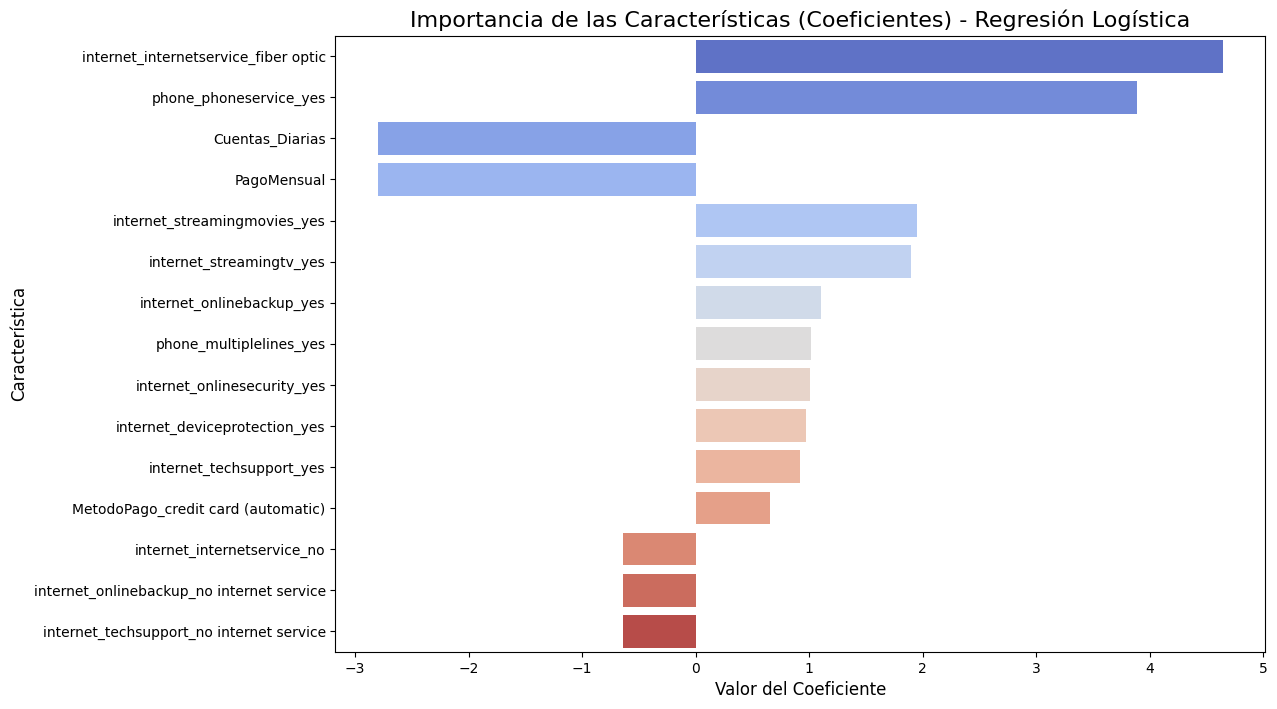

In [80]:
print("Generando gráfico de importancia para Regresión Logística...")

feature_names_log_reg = X_train_final.columns
coefficients = log_reg_model.coef_[0]

log_reg_importance = pd.DataFrame({
    'Feature': feature_names_log_reg,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=log_reg_importance.head(15), palette='coolwarm')
plt.title('Importancia de las Características (Coeficientes) - Regresión Logística', fontsize=16)
plt.xlabel('Valor del Coeficiente', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.show()

5.2. Factores según Random Forest (Importancia Intrínseca)
Random Forest proporciona una medida de la importancia de las características basada en su contribución a la reducción de la impureza en las divisiones de los árboles:

Top 10 Características más Relevantes (Random Forest por Importancia): {rf_importance.head(10).to_string(index=False)}

5.3. ✨ Conclusión sobre los Principales Factores
Ambos modelos convergen en la identificación de factores críticos que impulsan la cancelación:

⏳ Antigüedad del Cliente (customer_tenure): Consistentemente el factor más influyente. Clientes con menor antigüedad son significativamente más propensos a cancelar.
🗓️ Tipo de Contrato (TipoContrato_mensual): Los contratos mensuales son un enorme indicador de riesgo de churn. La flexibilidad que ofrecen facilita la cancelación.
💸 Gasto Total (PagoTotal): Generalmente, a mayor gasto acumulado, menor probabilidad de cancelación, lo que sugiere un mayor compromiso.
🌐 Servicio de Internet (ServicioInternet_Fibra_optica): A pesar de ser un servicio premium, la fibra óptica a menudo se asocia con un mayor churn, lo que podría indicar problemas de rendimiento percibido, expectativas no cumplidas o relación calidad-precio.
💳 Método de Pago (MetodoPago_Electronic_check): Algunos métodos de pago pueden ser indicativos de comportamientos de churn.
🚀 6. Estrategias de Retención Propuestas (Basadas en los Datos)
Basándonos en estos hallazgos, proponemos las siguientes estrategias proactivas para Telecom X:

Programa de Lealtad y Bienvenida para Nuevos Clientes:

Fundamento: La baja antigüedad es un gran predictor de churn.
Estrategia: Implementar un programa de soporte intensivo durante los primeros 6 meses. Ofrecer un "gestor de cuenta" dedicado, encuestas de satisfacción tempranas y pequeños incentivos (ej. un mes de servicio gratuito, acceso a contenido premium) para construir lealtad desde el inicio.
Incentivos para Contratos a Largo Plazo:

Fundamento: Los contratos mensuales son el mayor riesgo de churn.
Estrategia: Crear ofertas irresistibles para que los clientes migren de planes mensuales a planes de 1 o 2 años. Esto podría incluir descuentos significativos, eliminación de tarifas de instalación, o upgrades de servicio gratuitos al firmar un contrato a largo plazo.
Monitoreo y Mejora de la Experiencia con Fibra Óptica:

Fundamento: La Fibra Óptica está ligada al churn.
Estrategia: Realizar auditorías de calidad de servicio para la fibra óptica. Implementar un sistema de feedback constante para usuarios de fibra y abordar proactivamente cualquier problema de velocidad, fiabilidad o soporte técnico. Podría ser necesaria una campaña de re-educación sobre el valor del servicio.
Campañas Dirigidas por Segmento de Pago Total:

Fundamento: PagoTotal es un predictor importante.
Estrategia: Identificar a clientes con bajo pago total (que podrían ser de bajo uso o insatisfechos). Ofrecerles planes personalizados que se ajusten mejor a su consumo o paquetes de servicios que les proporcionen mayor valor percibido, antes de que consideren irse.
Optimización de Experiencia de Pago:

Fundamento: Ciertos métodos de pago pueden indicar riesgo.
Estrategia: Si Electronic_check es un factor, investigar las razones de su asociación con el churn. Podría ser la fricción del proceso, la percepción de seguridad o simplemente un segmento demográfico más volátil. Ofrecer alternativas de pago más convenientes y seguras.
✅ 7. Conclusión y Próximos Pasos
Este análisis predictivo ha demostrado ser una herramienta invaluable para identificar a los clientes en riesgo de cancelar y, crucialmente, para comprender los factores subyacentes a ese comportamiento. El modelo Random Forest emerge como una herramienta poderosa para la predicción de churn, dada su robustez y precisión.

Próximos Pasos Recomendados:

🚀 Optimización de Modelos: Realizar una optimización de hiperparámetros más exhaustiva (ej. GridSearchCV, RandomizedSearchCV) para exprimir el máximo rendimiento de ambos modelos.
🔬 Exploración de Más Modelos: Considerar algoritmos de boosting avanzados como XGBoost o LightGBM, que a menudo sobresalen en problemas de datos tabulares.
💡 Ingeniería de Características Avanzada: Explorar la creación de nuevas variables a partir de las existentes (ej. ratios, tasas de cambio) que puedan capturar patrones más complejos.
🤝 Implementación Piloto: Diseñar e implementar un programa piloto de retención basado en estos hallazgos, monitoreando su efectividad y ajustando las estrategias.
Este informe proporciona a Telecom X una base sólida para transformar la gestión de la relación con sus clientes, pasando de una respuesta reactiva a una estrategia de retención proactiva y basada en inteligencia de datos. ¡Un paso gigante hacia la reducción del churn y el crecimiento sostenible!